In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)
print("All paths have been successfully added")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

All paths have been successfully added


In [23]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [24]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

Training data processing

In [25]:
X_train=[]
Y_train=[]
img_size=150
labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels :
    fldp=os.path.join('/kaggle/input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(fldp):
        img=cv2.imread(os.path.join(fldp,j))
        img = cv2.resize(img,(img_size,img_size))
        X_train.append(img)
        Y_train.append(i)
for i in labels :
    fldp=os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(fldp):
        img=cv2.imread(os.path.join(fldp,j))
        img = cv2.resize(img,(img_size,img_size))
        X_train.append(img)
        Y_train.append(i)
        
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [26]:
X_train,Y_train=shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

Splitting train and test data

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [28]:
y_train_new=[]
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train=tf.keras.utils.to_categorical(y_train)

y_test_new=[]
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test=tf.keras.utils.to_categorical(y_test)


CNN

In [29]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [32]:
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 0.2948 - loss: 3.8507 - val_accuracy: 0.5612 - val_loss: 1.2185
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.4978 - loss: 1.1231 - val_accuracy: 0.6293 - val_loss: 0.9653
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.5899 - loss: 0.9451 - val_accuracy: 0.6565 - val_loss: 0.8444
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.6474 - loss: 0.8002 - val_accuracy: 0.7721 - val_loss: 0.6385
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 229s 3s/step - accuracy: 0.6991 - loss: 0.6974 - val_accuracy: 0.7857 - val_loss: 0.6282
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 230s 3s/step - accuracy: 0.7494 - loss: 0.5860 - val_accuracy: 0.7789 - val_loss: 0.5083
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.8010 - loss: 0.5000 - val_accuracy: 0.7449 - val_loss: 0.5856
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 232s 3s/step - accuracy: 0.7940 - loss: 0.5126 - val_accuracy: 0.8367 - v

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

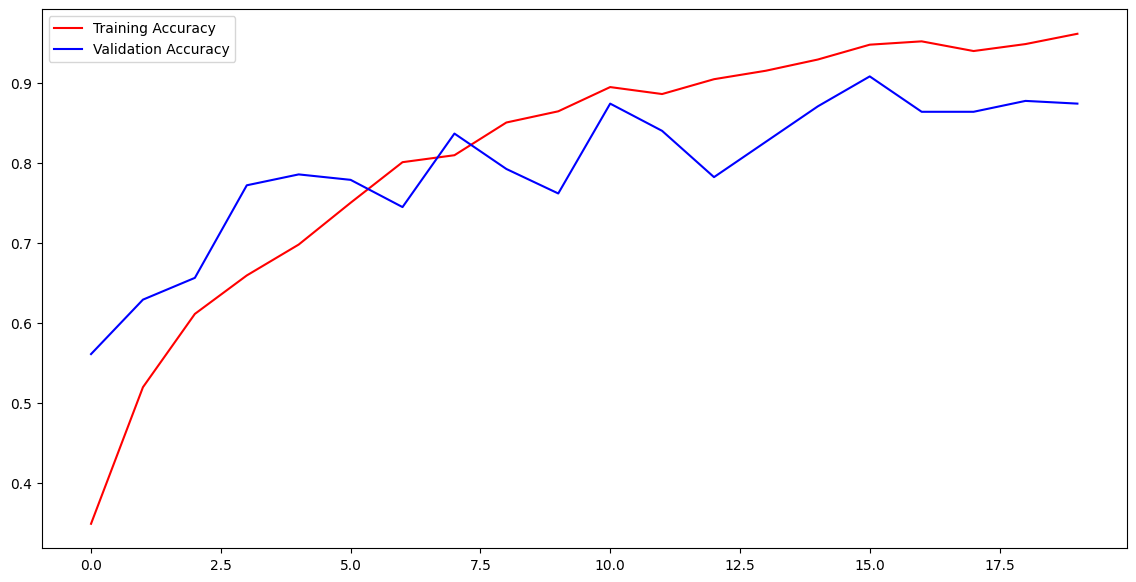

In [35]:
#model.save('braintumor.h1')
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()


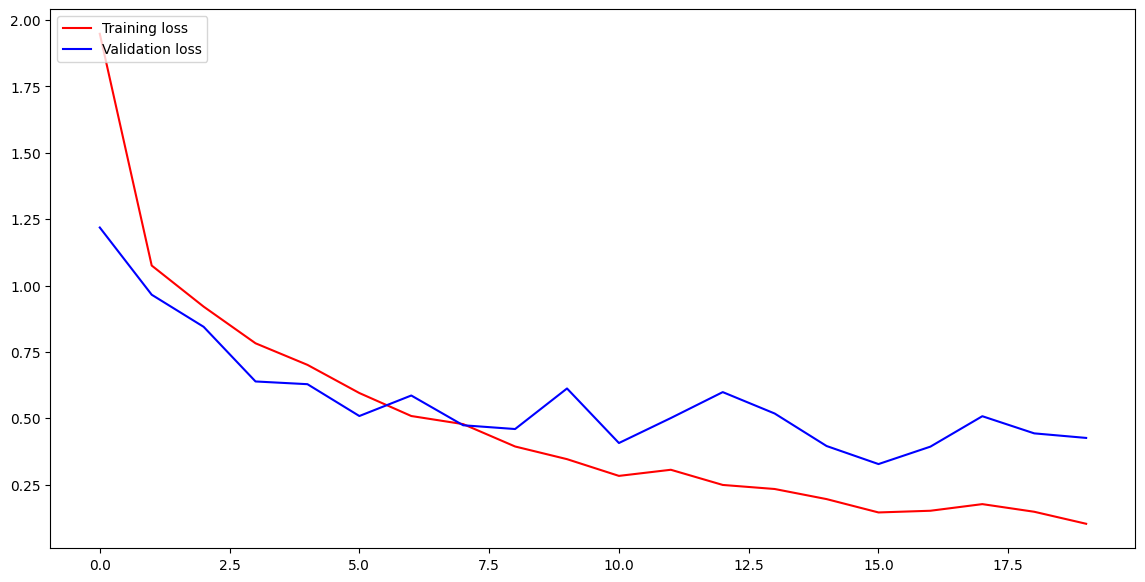

In [36]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(loss))
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()


prediction


In [37]:
img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m (119).jpg')
img=cv2.resize(img,(150,150))
img_array=np.array(img)
img_array.shape

(150, 150, 3)

In [38]:
img_array=img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

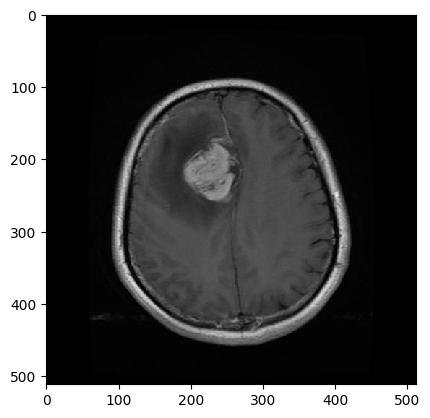

In [41]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m (119).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [45]:
x=model.predict(img_array)
ind=x.argmax()
if(ind==0):
    print("glioma_tumor")
elif(ind==1):
    print("meningioma_tumor")
elif(ind==2):
    print("no_tumor")
elif(ind==3):
    print("pituitary_tumor")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
meningioma_tumor
